# Data importing


In [600]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import plotly.express as px
from imblearn.over_sampling import SMOTE
import pickle

In [122]:
sns.set()

In [59]:
df = pd.read_csv("diabetes.csv")

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**No Messing Values**

In [67]:
df.duplicated().sum()

0

**No duplicated Values**

In [69]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100,88,60,110,46.8,0.962,31,0
601,6,96,0,0,0,23.7,0.190,28,0
705,6,80,80,36,0,39.8,0.177,28,0
747,1,81,74,41,57,46.3,1.096,32,0
130,4,173,70,14,168,29.7,0.361,33,1
695,7,142,90,24,480,30.4,0.128,43,1
474,4,114,64,0,0,28.9,0.126,24,0
232,1,79,80,25,37,25.4,0.583,22,0
13,1,189,60,23,846,30.1,0.398,59,1
27,1,97,66,15,140,23.2,0.487,22,0


In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [127]:
Integer_Features = df.select_dtypes(include="int64").columns.to_list()

In [77]:
df[Integer_Features] = df.select_dtypes(include="int64").astype("int16")

**Convert from int64 to int16 for all Integer features since the max value for each column is less than 2^16**

In [110]:
df[["DiabetesPedigreeFunction","BMI"]]=df[["DiabetesPedigreeFunction","BMI"]].astype("float16")

**Convert from flaot64 to int16 for all floating features since the max value for each column is less than 2^16**

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int16  
 1   Glucose                   768 non-null    int16  
 2   BloodPressure             768 non-null    int16  
 3   SkinThickness             768 non-null    int16  
 4   Insulin                   768 non-null    int16  
 5   BMI                       768 non-null    float16
 6   DiabetesPedigreeFunction  768 non-null    float16
 7   Age                       768 non-null    int16  
 8   Outcome                   768 non-null    int16  
dtypes: float16(2), int16(7)
memory usage: 13.6 KB


# Data Analysis

In [170]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.593750,0.626953,50,1
1,1,85,66,29,0,26.593750,0.351074,31,0
2,8,183,64,0,0,23.296875,0.671875,32,1
3,1,89,66,23,94,28.093750,0.166992,21,0
4,0,137,40,35,168,43.093750,2.287109,33,1


In [118]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,32.000000,0.471924,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.882812,0.331299,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078003,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243774,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372559,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626221,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,81.000000,1.000000


In [358]:
def make_hist_plot(df,column):
    plt.figure(figsize=(8,5))
    plt.title(f"distrebution of {column}")
    sns.histplot(x=column,data=df)
    plt.xlabel(column)
    plt.axvline(x=df[column].mean(),label="Mean",c="green")
    plt.axvline(x=df[column].median(),label="Median",c="Red")
    plt.legend()
    plt.show()
def make_count_polt(df,column,w=8,h=5):
    plt.figure(figsize=(w,h))
    plt.title(f"Count plot of {column}")
    sns.countplot(x=column,data=df)
    
    plt.axvline(x=df[column].mean(),label="Mean",c="green")
    plt.axvline(x=df[column].median(),label="Median",c="Red")
    plt.legend()
    plt.xlabel(column)
    plt.show()

def make_box_plot(df,column):
    figure=px.box(x=column,data_frame=df,title=f"Box plot for {column}",points="outliers")
    figure.show()   

#### 1. Outcome

<Axes: xlabel='Outcome', ylabel='count'>

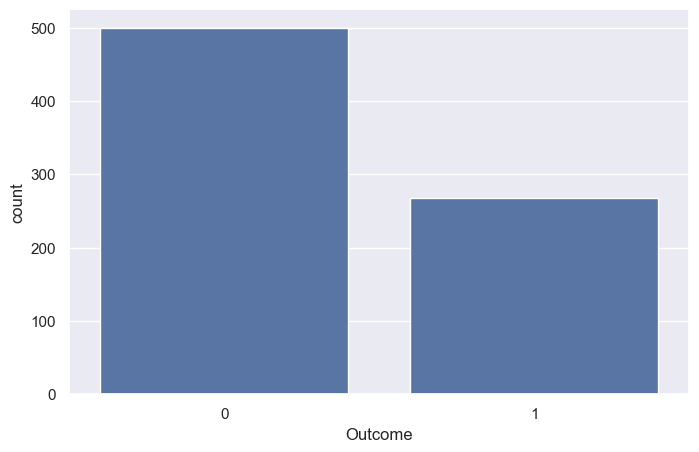

In [373]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="Outcome")

#### 2.Pregnancies 

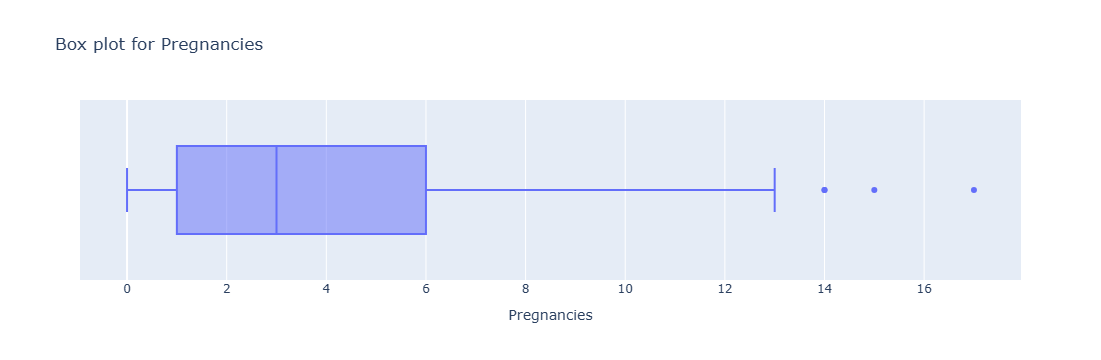

In [233]:
make_box_plot(df,"Pregnancies")

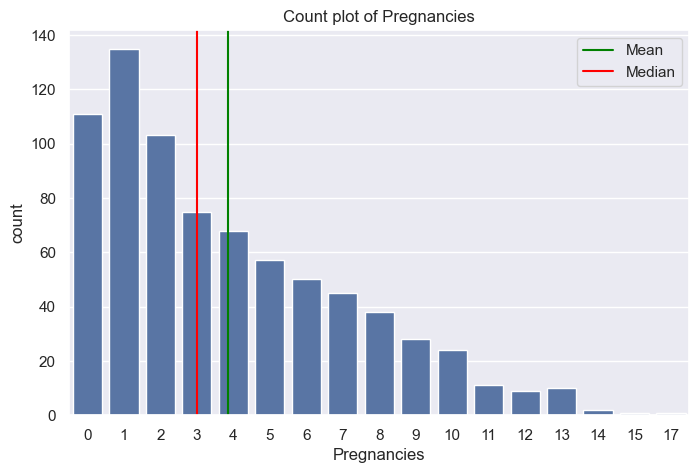

In [253]:
make_count_polt(df,"Pregnancies")

In [180]:
df[df["Pregnancies"]== 1]["Outcome"].value_counts()

Outcome
0    106
1     29
Name: count, dtype: int64

#### 3.Glucose

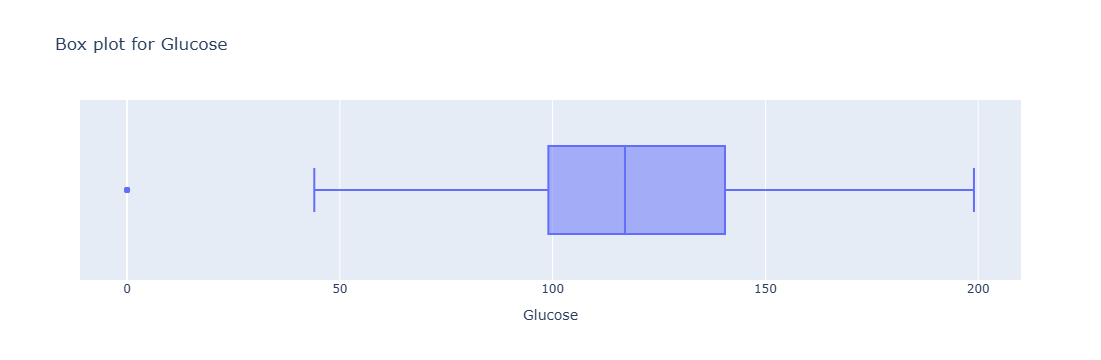

In [245]:
make_box_plot(df,"Glucose")

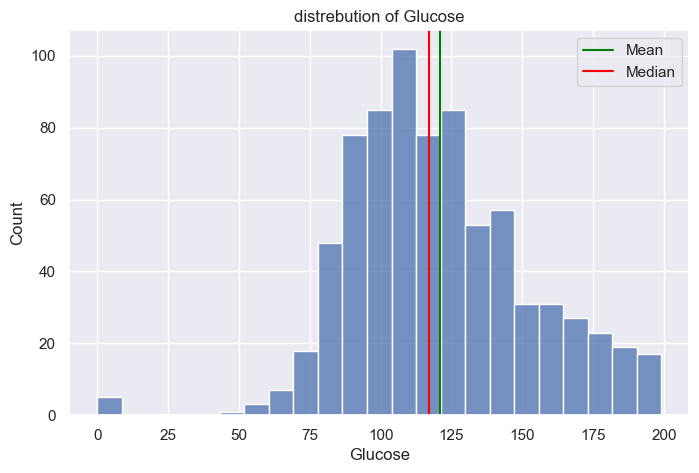

In [299]:
make_hist_plot(column="Glucose",df=df)

In [319]:
df[(df.Glucose >=99) & (df.Glucose <=140)]["Outcome"].value_counts()

Outcome
0    276
1    120
Name: count, dtype: int64

#### 4. BloodPressure

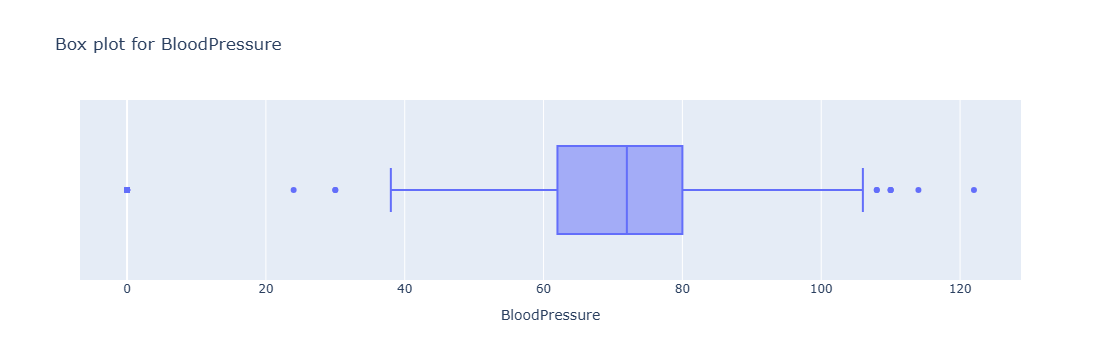

In [290]:
make_box_plot(df,"BloodPressure")

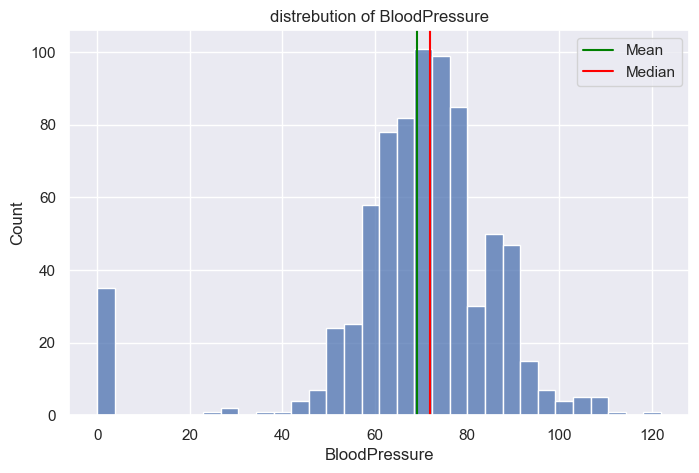

In [301]:
make_hist_plot(df,"BloodPressure")

In [321]:
df[(df.BloodPressure >=62) & (df.BloodPressure <=80)]["Outcome"].value_counts()

Outcome
0    292
1    152
Name: count, dtype: int64

#### 3.SkinThickness

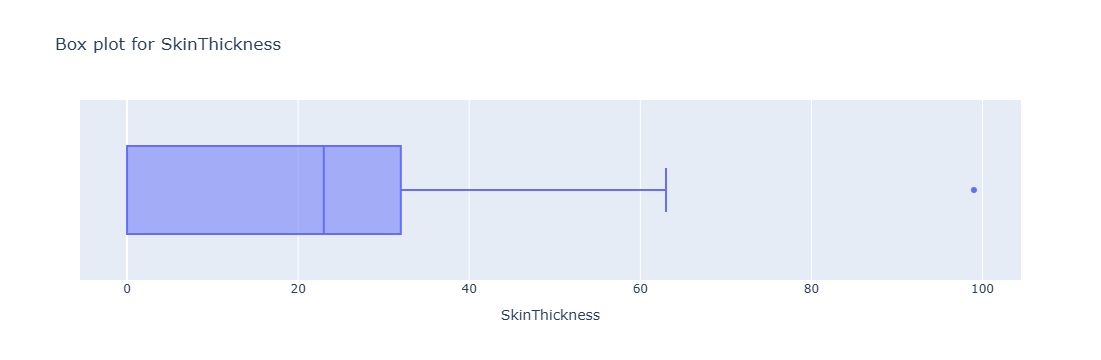

In [295]:
make_box_plot(df,"SkinThickness")

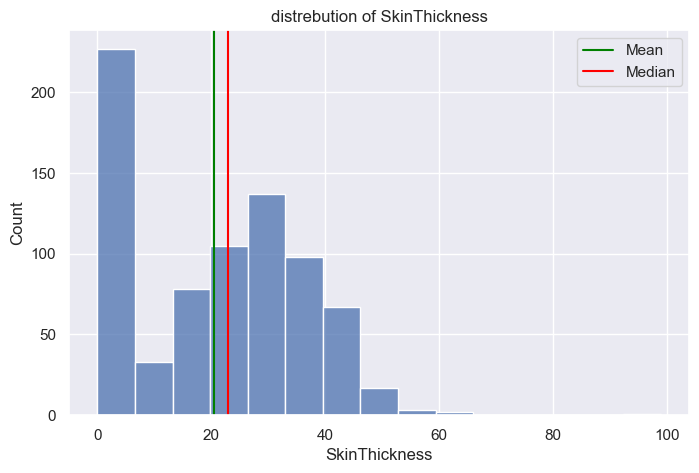

In [303]:
make_hist_plot(df,"SkinThickness")

In [326]:
df[(df.SkinThickness >=0) & (df.SkinThickness <=32)]["Outcome"].value_counts()

Outcome
0    400
1    180
Name: count, dtype: int64

In [330]:
df[(df.SkinThickness == 0) ]["Outcome"].value_counts()

Outcome
0    139
1     88
Name: count, dtype: int64

#### 4.Insulin

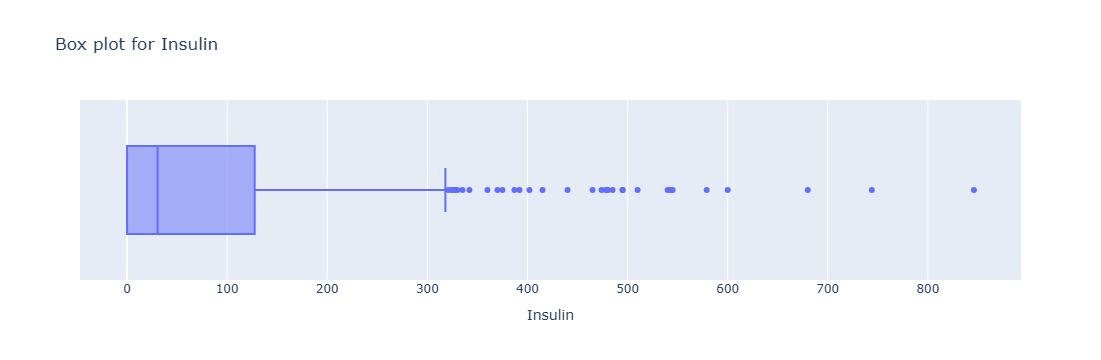

In [333]:
make_box_plot(df,"Insulin")

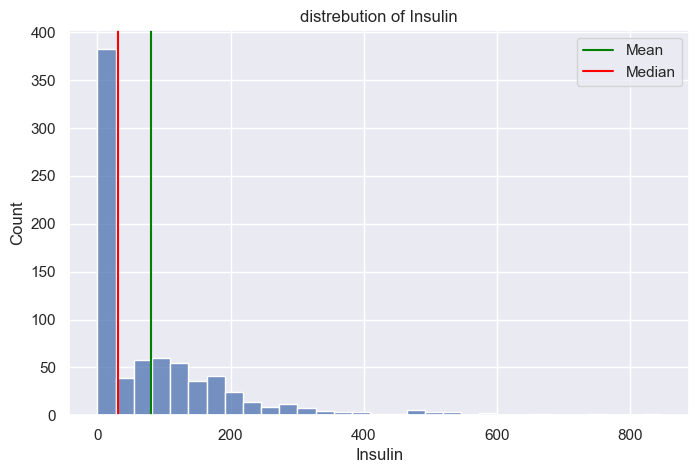

In [335]:
make_hist_plot(df,"Insulin")

In [337]:
df[(df.Insulin == 0) ]["Outcome"].value_counts()

Outcome
0    236
1    138
Name: count, dtype: int64

In [339]:
df[(df.Insulin >=0) & (df.Insulin <=100)]["Outcome"].value_counts()

Outcome
0    368
1    157
Name: count, dtype: int64

In [341]:
df[(df.Insulin > 0) ]["Outcome"].value_counts()

Outcome
0    264
1    130
Name: count, dtype: int64

#### 5.BMI

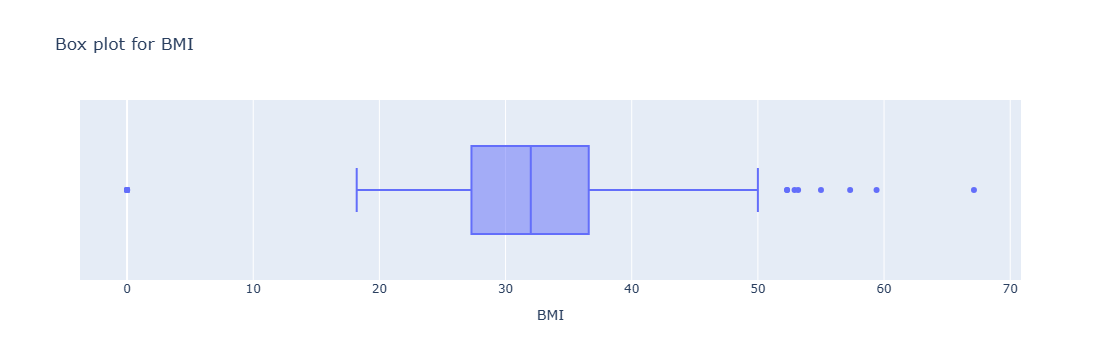

In [344]:
make_box_plot(df,"BMI")

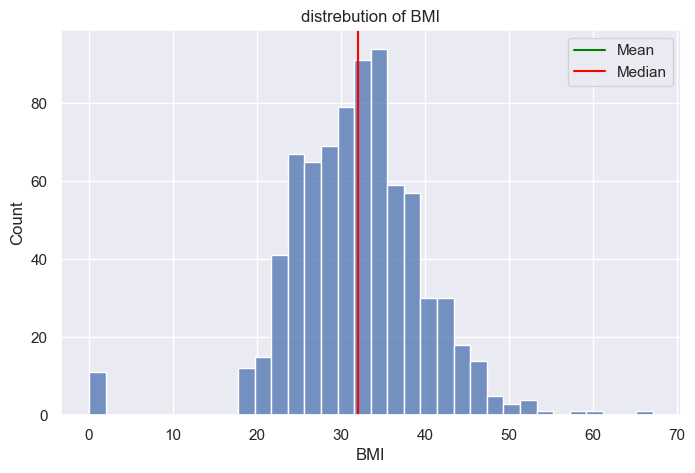

In [346]:
make_hist_plot(df,"BMI")

In [348]:
df[(df.BMI >=27) & (df.BMI <=37)]["Outcome"].value_counts()

Outcome
0    247
1    161
Name: count, dtype: int64

#### 6.Age

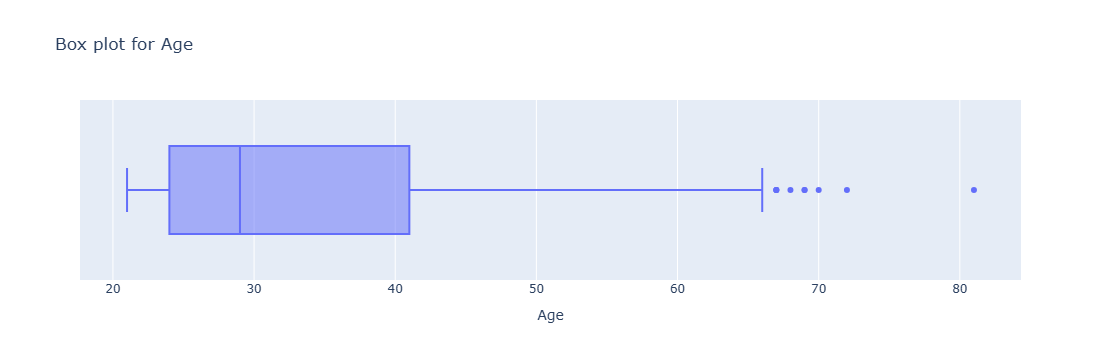

In [379]:
make_box_plot(df,"Age")

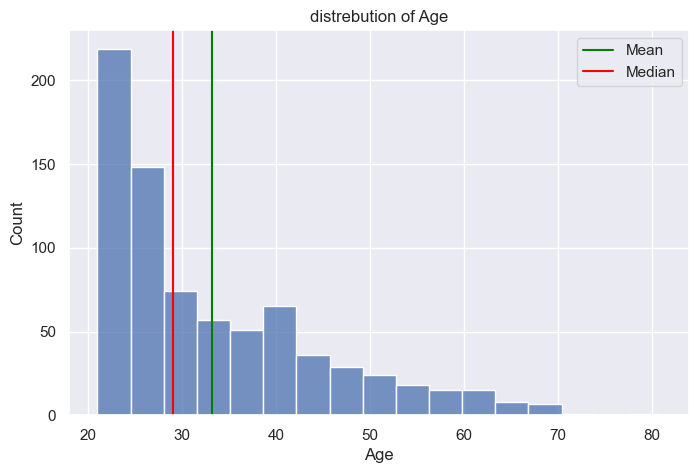

In [381]:
make_hist_plot(df,"Age")

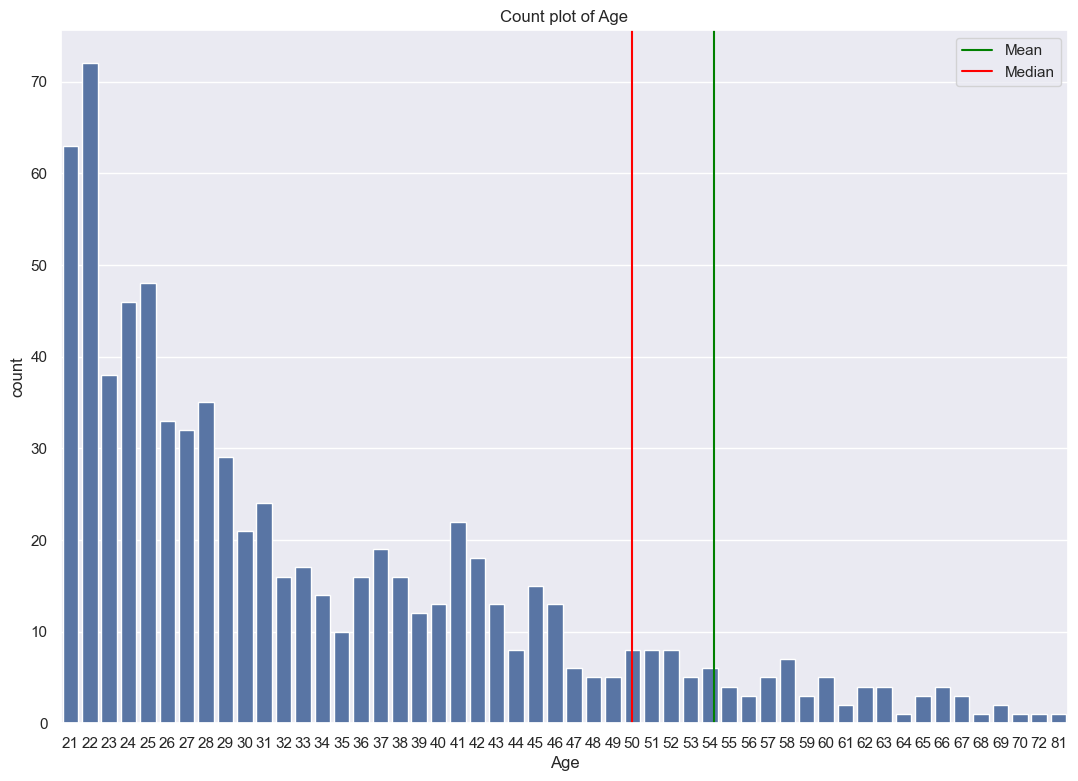

In [385]:
make_count_polt(df,"Age",13,9)

# Data preprocessing

In [645]:
X=df.drop(columns=["Outcome"])
Y=df.Outcome

#### Splitting

In [647]:
X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=32,test_size=0.2)

In [649]:
Y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

#### handle imbalance  dataset

In [651]:
sm= SMOTE(random_state=42)
X_train,Y_train=sm.fit_resample(X_train,Y_train)

In [653]:
Y_train.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

#### Train the models

In [473]:
models = {
    "Random Forest":RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42,),
    "Support Vector":SVC(random_state=42)
}

In [477]:
result={}
for model_name,model in models.items():
    scores=cross_val_score(model,X_train,Y_train,cv=9)
    result[model_name]=scores.mean()
result


{'Random Forest': 0.8117908170342627,
 'Decision Tree': 0.7518657234013039,
 'Support Vector': 0.7157303370786516}

RandomForestClassifier has the highest accuracy

#### Choose RandomForestClassifier

In [655]:
model = RandomForestClassifier(random_state=42,max_depth=100,max_features='log2')

In [657]:
model.fit(X_train.values,Y_train.values)

RandomForestClassifier(max_depth=100, max_features='log2', random_state=42)

In [659]:
accuracy_score(Y_test,model.predict(X_test.values))

0.8311688311688312

# deploy the model

In [672]:
with open("model.pickle","wb")as file :
    pickle.dump(model,file)